### 1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\assignments\\delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data=data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1)
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

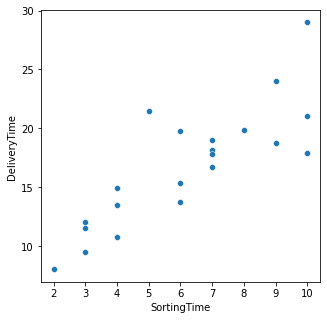

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='SortingTime',y='DeliveryTime',data=data,palette='Set1')

## Correlation

In [8]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

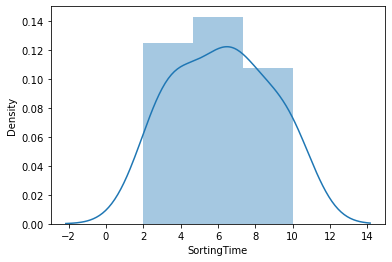

In [9]:
import seaborn as sns
sns.distplot(data['SortingTime'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

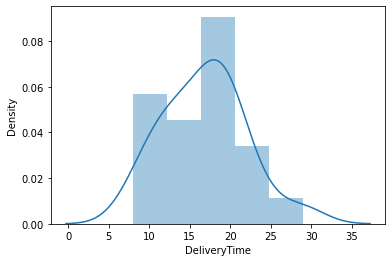

In [10]:
sns.distplot(data['DeliveryTime'])

## Fitting Linear Regression Model

In [37]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [12]:
#ols=ordinary least squares
model=smf.ols("DeliveryTime~SortingTime",data=data).fit()

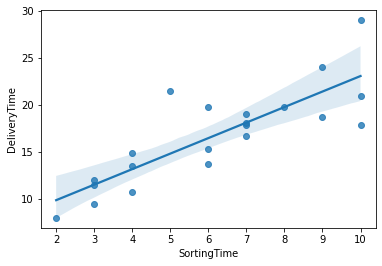

In [13]:
# to see best fitted line
sns.regplot(x="SortingTime",y="DeliveryTime",data=data);

In [14]:
# coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [15]:
# model prediction
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [16]:
model.rsquared

0.6822714748417231

In [17]:
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [18]:
data['Predicted']=model.fittedvalues

In [19]:
data['Error']=model.resid

In [20]:
data

,DeliveryTime,SortingTime,Predicted,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [21]:
data['Error_sq']=(data['Error']**2)
data['Error_sq']

0      4.297051
1      0.103161
2     10.713489
3      6.636224
4     35.130124
5      1.269798
6      0.764098
7      4.120062
8     26.759235
9      7.149811
10     0.003037
11     5.899135
12     2.090549
13     0.000888
14     0.250206
15     2.894035
16     7.435729
17     0.000252
18     3.537310
19     0.087541
20    44.517806
Name: Error_sq, dtype: float64

In [35]:
x=data['SortingTime']
y=data['DeliveryTime']

# 1. No Trasformation

In [38]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           DeliveryTime   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    6.12e-15
Time:                        16:06:00   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SortingTime     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of x

In [42]:
x_log = np.log(data['SortingTime'])

In [43]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           DeliveryTime   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    1.48e-17
Time:                        16:07:44   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SortingTime     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 - Log Transformation of Y

In [46]:
y_log = np.log(data['DeliveryTime'])

In [47]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           DeliveryTime   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    3.00e-12
Time:                        16:09:14   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SortingTime     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 - Log Transformation of X & Y

In [49]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           DeliveryTime   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    5.72e-17
Time:                        16:10:12   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SortingTime     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5 - Sq Root Transformation of X

In [53]:
x_sqrt = np.sqrt(data['SortingTime'])

In [54]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           DeliveryTime   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    1.88e-17
Time:                        16:11:22   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SortingTime     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6 - Square Root Transformation of Y

In [56]:
y_sqrt = np.sqrt(data['DeliveryTime'])

In [57]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           DeliveryTime   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    5.09e-13
Time:                        16:12:32   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SortingTime     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7 - Square Root Transformation of X & Y

In [59]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           DeliveryTime   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    2.10e-20
Time:                        16:13:21   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SortingTime     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### among all the Transformation  model 7(square root transformation of x&y)  gives highest Rsquared Value hence model  is the best to use
##### since p-value is less than 0.05 the model is accepted

## 2) Salary_hike -> Build a prediction model for Salary_hike

In [62]:
import pandas as pd
salary=pd.read_csv("C:\\Users\\DELL\\Desktop\\assignments\\Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [63]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

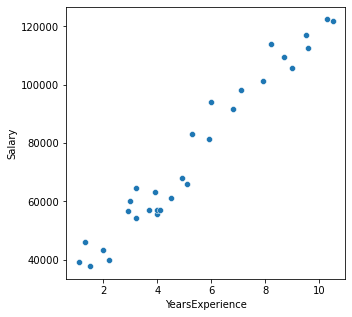

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='YearsExperience',y='Salary',data=salary,palette='Set1')

In [65]:
# correlation
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

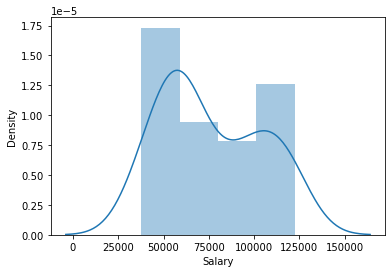

In [66]:
import seaborn as sns
sns.distplot(salary['Salary'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

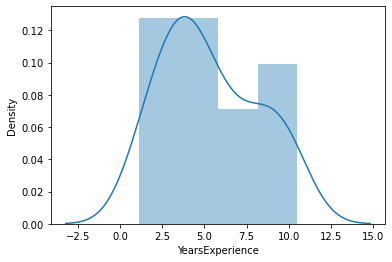

In [67]:
sns.distplot(salary['YearsExperience'])

## Fitting a Linear Regression Model

In [68]:
import statsmodels.formula.api as smf

In [69]:
#ols=ordinary least squares
model=smf.ols("Salary~YearsExperience",data=salary).fit()

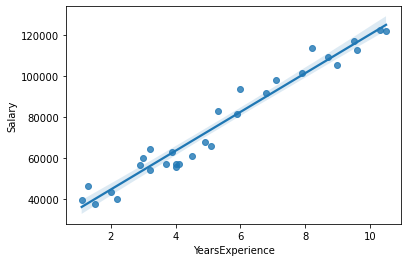

In [70]:
# best fit line
sns.regplot(x="YearsExperience",y="Salary",data=salary);

In [71]:
#coeeficient
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [72]:
#to see the model prediction
model.fittedvalues


0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [73]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [74]:
model.rsquared

0.9569566641435086

In [75]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [76]:
salary['Predicted']=model.fittedvalues

In [77]:
salary['error']=model.resid

In [78]:
salary

,YearsExperience,Salary,Predicted,error
0,1.1,39343,36187.158752,3155.841248
1,1.3,46205,38077.151217,8127.848783
2,1.5,37731,39967.143681,-2236.143681
3,2.0,43525,44692.124842,-1167.124842
4,2.2,39891,46582.117306,-6691.117306
5,2.9,56642,53197.090931,3444.909069
6,3.0,60150,54142.087163,6007.912837
7,3.2,54445,56032.079627,-1587.079627
8,3.2,64445,56032.079627,8412.920373
9,3.7,57189,60757.060788,-3568.060788


In [79]:
salary['Error_sq']=(salary['error']**2)
salary['Error_sq']

0     9.959334e+06
1     6.606193e+07
2     5.000339e+06
3     1.362180e+06
4     4.477105e+07
5     1.186740e+07
6     3.609502e+07
7     2.518822e+06
8     7.077723e+07
9     1.273106e+07
10    3.259802e+05
11    6.080958e+07
12    4.402388e+07
13    5.559262e+07
14    5.192688e+07
15    1.729741e+07
16    6.332989e+07
17    5.199851e+07
18    3.384787e+04
19    1.310573e+08
20    2.842785e+06
21    2.900972e+07
22    7.311917e+05
23    1.108832e+08
24    2.028139e+06
25    2.766614e+07
26    1.966046e+06
27    1.502988e+07
28    5.414195e+05
29    9.889796e+06
Name: Error_sq, dtype: float64

In [81]:
x = salary['YearsExperience']
y = salary['Salary']

# Model Trasformation

# 1. No Transformation

In [82]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    2.56e-24
Time:                        16:21:17   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2 - Log Transformation of X

In [84]:
x_log = np.log(salary['YearsExperience'])

In [85]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    8.06e-26
Time:                        16:22:14   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 - Log Transformation of Y

In [87]:
y_log = np.log(salary['Salary'])

In [88]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    6.09e-12
Time:                        16:23:08   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 - Log Transformation of X & Y

In [90]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    8.60e-15
Time:                        16:24:02   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5 - Sq Root Transformation of X

In [92]:
x_sqrt = np.sqrt(salary['YearsExperience'])

In [93]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    3.62e-30
Time:                        16:24:58   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6 - Square Root Transformation of Y

In [95]:
y_sqrt = np.sqrt(salary['Salary'])

In [96]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    2.12e-16
Time:                        16:25:51   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7 - Square Root Transformation of X & Y

In [98]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    2.81e-29
Time:                        16:26:27   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Output Interpretation


We will use Model 5 as it has the best R square value

1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == 3.48e+04
Thus if the value of years of experience is increased by 1, the predicted value of Salary hike will increase by 3.48e+04

3 - Adj. R-sqared == 0.989
Thus the model explains 98.9% of the variance in dependent variable